# Context
Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean 
used and where the beans were grown.

### Flavors of Cacao Rating System:
- 5 = Elite (Transcending beyond the ordinary limits)
- 4 = Premium (Superior flavor development, character and style)
- 3 = Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
- 2 = Disappointing (Passable but contains at least one significant flaw)
- 1 = Unpleasant (mostly unpalatable)


Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch. 

### Inspiration

- Where are the best cocoa beans grown?
- Which countries produce the highest-rated bars?
- What’s the relationship between cocoa solids percentage and rating?

## Importing required Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load dataset

In [2]:
# Load the dataset
cacao_df = pd.read_csv('flavors_of_cacao.csv')
# cacao_df = pd.read_csv('flavors_of_cacao.csv', encoding = "ISO-8859-1")

In [3]:
cacao_df.shape

(1795, 9)

In [4]:
cacao_df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [5]:
cacao_df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [6]:
#renaming the column
cacao_df.rename({
    'Company\xa0\n(Maker-if known)': 'Company', 'Specific Bean Origin\nor Bar Name': 'Bean_Bar_Origin', 'Review\nDate': 'Review_year',
    'Cocoa\nPercent': 'Cocoa_percent', 'Company\nLocation': 'Company_location', 'Bean\nType': 'Bean_type',  'Broad Bean\nOrigin':  'Bean_origin'
}, axis=1,inplace=True)

In [7]:
cacao_df.head()

,Company,Bean_Bar_Origin,REF,Review_year,Cocoa_percent,Company_location,Rating,Bean_type,Bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [8]:
cacao_df.describe().T

,count,mean,std,min,25%,50%,75%,max
REF,1795.0,1035.904735,552.886365,5.0,576.000,1069.00,1502.0,1952.0
Review_year,1795.0,2012.325348,2.927210,2006.0,2010.000,2013.00,2015.0,2017.0
Rating,1795.0,3.185933,0.478062,1.0,2.875,3.25,3.5,5.0


In [9]:
# Check categorical and numerical features
cacao_df.dtypes

Company              object
Bean_Bar_Origin      object
REF                   int64
Review_year           int64
Cocoa_percent        object
Company_location     object
Rating              float64
Bean_type            object
Bean_origin          object
dtype: object

In [10]:
cacao_df.head()

,Company,Bean_Bar_Origin,REF,Review_year,Cocoa_percent,Company_location,Rating,Bean_type,Bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## **1. Data Cleaning**

### 1.1 Remove  `%` from Cocoa_percent column

As we can see that Cocoa_percent column contain `%`, so let's remove it

In [11]:
# Remove  % from Cocoa_percent
cacao_df['Cocoa_percent'].replace("%", "", regex=True, inplace=True)
cacao_df['Cocoa_percent'] = cacao_df['Cocoa_percent'].astype('float64')/100

cacao_df.head()

,Company,Bean_Bar_Origin,REF,Review_year,Cocoa_percent,Company_location,Rating,Bean_type,Bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


### 1.2 Lets round `Rating` value as 0, 1, 2, 3, 4, and 5

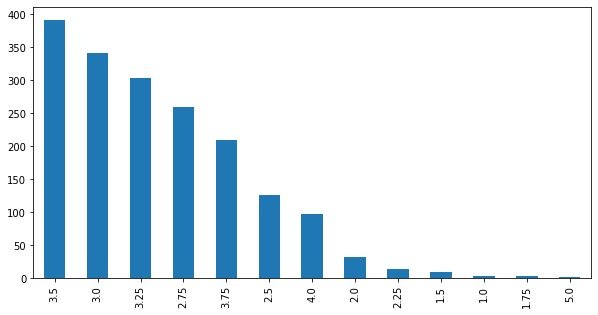

In [12]:
# cacao_df.Rating.value_counts()
plt.figure(figsize=(10,5))
cacao_df.Rating.value_counts().plot(kind='bar')
plt.show()

In [13]:
cacao_df.Rating.unique()

array([3.75, 2.75, 3.  , 3.5 , 4.  , 3.25, 2.5 , 5.  , 1.75, 1.5 , 2.25,
       2.  , 1.  ])

#### We can see that rating values are in between 1 to 5, Let' round it as 0,1,2,3,4 and 5

In [14]:
cacao_df['Rating'] = cacao_df['Rating'].astype('int32')

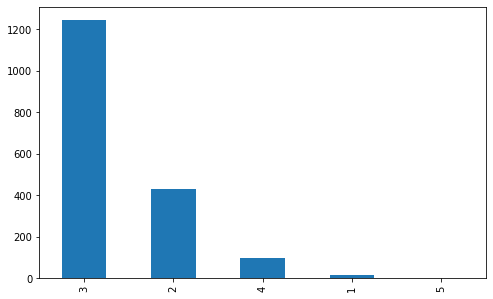

In [15]:
plt.figure(figsize=(8,5))
cacao_df.Rating.value_counts().plot(kind='bar')
plt.show()

#### We can see that rating is now rounded as  0, 1, 2, 3, 4, and 5

### 1.3 Let's replace `Bean_type` to common type

In [16]:
cacao_df["Bean_type"].unique()

array(['\xa0', 'Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', nan, 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

- **From above list we can see different type of Bean_type, so replace it as follow**

In [17]:
criollo_list = [
    'Criollo', 'Criollo, Trinitario', 'Criollo (Porcelana)', 'Trinitario (85% Criollo)', 'Trinitario, Criollo', 'Criollo (Ocumare)', 
    'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)', 'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Criollo, +', 
    'Criollo, Forastero', 'Criollo (Amarru)']

forastero_list = [
    'Forastero', 'Forastero (Arriba)', 'Forastero (Nacional)', 'Forastero (Catongo)', 'Forastero (Parazinho)',
    'Forastero (Arriba) ASS', 'Forastero(Arriba, CCN)', 'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
    'Forastero (Amelonado)']

trinitario_list = [
    'Trinitario', 'Trinitario (85% Criollo)', 'Trinitario, Criollo', 'Trinitario, Forastero',
    'Trinitario (Scavina)', 'Trinitario, Nacional', 'Trinitario (Amelonado)', 'Trinitario, TCGA']

amazon_list = ['Amazon mix', 'Amazon', 'Amazon, ICS']
blend_list = ['Blend', 'Blend-Forastero,Criollo']

nacional_list = ['Nacional (Arriba)', 'Nacional']
unknown_list = ['\xa0', np.nan]

In [18]:
# function to replace bean_type
def replace_bean_type(bean_list, to_replace):
    for bean in bean_list:
        cacao_df['Bean_type'].replace(bean, to_replace, inplace=True)

In [19]:
replace_bean_type(criollo_list, 'Criollo')
replace_bean_type(forastero_list, 'Forastero')
replace_bean_type(trinitario_list, 'Trinitario')
replace_bean_type(amazon_list, 'Amazon')
replace_bean_type(blend_list, 'Blend')
replace_bean_type(nacional_list, 'Nacional')
replace_bean_type(unknown_list, 'Other')

In [20]:
cacao_df["Bean_type"].unique()

array(['Other', 'Criollo', 'Trinitario', 'Forastero', 'Blend', 'CCN51',
       'Nacional', 'Beniano', 'Amazon', 'EET', 'Matina'], dtype=object)

In [21]:
cacao_df['Bean_type'].value_counts()

Other         888
Trinitario    425
Criollo       224
Forastero     196
Blend          42
Nacional        5
Amazon          5
Matina          3
Beniano         3
EET             3
CCN51           1
Name: Bean_type, dtype: int64

**We can see that `Bean_type` are imputed with common Bean types**

### 1.4 Cleaning the  `Company_location` column

In [22]:
len(list(cacao_df.Company_location.unique()))

60

In [23]:
print(sorted(list(cacao_df.Company_location.unique())))

['Amsterdam', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark', 'Domincan Republic', 'Ecuador', 'Eucador', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana', 'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar', 'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Niacragua', 'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore', 'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname', 'Sweden', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam', 'Wales']


**We can see that we have two misspelled entries for `Niacragua` and `Nicaragua`
Similarly for `Eucador' and 'Ecuador`**

**Lets replace misspelled entry with correct one**

In [24]:
cacao_df['Company_location'].replace({ 'Niacragua':'Nicaragua',
                                      'Eucador':'Ecuador', 
                                      'U.S.A.': 'USA', 
                                      'U.K.': 'UK'}, inplace=True)

In [25]:
len(list(cacao_df.Company_location.unique()))

58

### 1.5 Cleaning the  `Company` column 

In [26]:
sorted(list(cacao_df.Company.unique()))

['A. Morin',
 'AMMA',
 'Acalli',
 'Adi',
 'Aequare (Gianduja)',
 'Ah Cacao',
 "Akesson's (Pralus)",
 'Alain Ducasse',
 'Alexandre',
 'Altus aka Cao Artisan',
 'Amano',
 'Amatller (Simon Coll)',
 'Amazona',
 'Ambrosia',
 'Amedei',
 'Anahata',
 'Animas',
 'Ara',
 'Arete',
 'Artisan du Chocolat',
 'Artisan du Chocolat (Casa Luker)',
 'Askinosie',
 'Bahen & Co.',
 'Bakau',
 'Bar Au Chocolat',
 "Baravelli's",
 'Batch',
 'Beau Cacao',
 'Beehive',
 'Belcolade',
 'Bellflower',
 'Belyzium',
 'Benoit Nihant',
 'Bernachon',
 'Beschle (Felchlin)',
 'Bisou',
 'Bittersweet Origins',
 'Black Mountain',
 'Black River (A. Morin)',
 'Blanxart',
 'Blue Bandana',
 'Bonnat',
 'Bouga Cacao (Tulicorp)',
 'Bowler Man',
 "Brasstown aka It's Chocolate",
 'Brazen',
 'Breeze Mill',
 'Bright',
 'Britarev',
 'Bronx Grrl Chocolate',
 'Burnt Fork Bend',
 'C-Amaro',
 'Cacao Arabuco',
 'Cacao Atlanta',
 'Cacao Barry',
 'Cacao Hunters',
 'Cacao Market',
 'Cacao Prieto',
 'Cacao Sampaka',
 'Cacao Store',
 'Cacao de Orige

In [27]:
cacao_df['Company'].replace('Na�ve','Naive',inplace=True)

### 1.6 Cleaning the  `Bean_origin` column 

In [28]:
cacao_df['Bean_origin'].isna().sum()

1

Replace `Nan` with `Unknown`

In [29]:
cacao_df['Bean_origin'].replace(np.nan,'Unknown',inplace=True)

In [30]:
len(cacao_df['Bean_origin'].unique())

101

In [31]:
print(sorted(list(cacao_df['Bean_origin'].unique())))

['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia', 'Brazil', 'Burma', 'Cameroon', 'Carribean', 'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia', 'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica', 'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar', 'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic', 'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG', 'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar', 'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador', 'Gre., PNG, Haw., Haiti, Mad', 'Grenada', 'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii', 'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana', 'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG', 'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique', 'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama', 'Papua New Guinea', 'Peru', 'Peru(SMartin,Pangoa,nacional)', 'Peru, Belize', 'Peru, Dom. Rep', 'Peru, Ecuador', 'Peru, Ecuador, Venezue

**We can see that we have two misspelled entries for**

- 'Domincan Republic':'Dominican Republic', 
- 'Trinidad, Tobago':'Trinidad-Tobago',
- 'Venezuela, Ghana':'Venezuela/ Ghana',


**Lets replace misspelled entry with correct one**

In [32]:
cacao_df['Bean_origin'].replace({
    'Domincan Republic':'Dominican Republic', 
    'Trinidad, Tobago':'Trinidad-Tobago',
    'Venezuela, Ghana':'Venezuela/ Ghana',
    '\xa0': 'Unknown'}, inplace=True)

In [33]:
len(cacao_df.Bean_origin.unique())

97

### 1.7 Cleaning the  `Bean_Bar_Origin` column 

In [34]:
print(sorted(list(cacao_df['Bean_Bar_Origin'].unique())))

['"heirloom", Arriba Nacional', '100 percent', '2009 Hapa Nibby', 'A case of the Xerces Blues, triple roast', 'ABOCFA Coop', 'Abinao', 'Abstract S. w/ Jamaica nibs,batch abs60323.0', 'Acarigua, w/ nibs', 'Acopagro', 'Acul-du-Nord, 2015', 'Africa', 'Africa meets Latina', 'AgroCriso Plantation', 'Agua Fria; Sucre region', 'Agua Grande', 'Akata', 'Akesson Estate', 'Akesson P.', "Akesson's E., Sambirano V.", "Akesson's Estate", "Akesson's, batch 4411", 'Akessons Estate, Sambirano, 2013', 'Akessons Estate, Sambirano, Ambanja', 'Akosombo', 'Almendra Blanca, batch 1004', 'Alpaco', 'Alta Verapaz, 2014', 'Alto Beni', 'Alto Beni, Covendo Region', 'Alto Beni, Cru Savage', 'Alto Beni, Palos Blanco', 'Alto Beni, Palos Blancos', 'Alto Beni, Upper Rio Beni, 2014', 'Alto Beni, Upper Rio Beni, 2015', 'Alto Beni, Wild Bolivian', 'Alto Beni, Wild Harvest, Itenez R. 24hr c.', 'Alto Beni, Wild Harvest, Itenez R., 60hr c.', 'Alto Beni, Wild Harvest, Limited Ed.', 'Amazon Basin Blend', 'Amazonas', 'Amazonas 

In [35]:
# pd.DataFrame(cacao_df['Bean_Bar_Origin'].unique()).head(200)

### **1.8 Segregating columns into Categorical and Numerical columns**

Check categorical and numerical features

#### a. Categorical columns

In [36]:
categorical = cacao_df.select_dtypes(include='object')
print(f"Categorical features in dataset: {list(categorical.columns)}")

numerical = cacao_df.select_dtypes(exclude='object')
print(f"Numerical features in dataset: {list(numerical.columns)}")

cacao_df.head()

Categorical features in dataset: ['Company', 'Bean_Bar_Origin', 'Company_location', 'Bean_type', 'Bean_origin']
Numerical features in dataset: ['REF', 'Review_year', 'Cocoa_percent', 'Rating']


,Company,Bean_Bar_Origin,REF,Review_year,Cocoa_percent,Company_location,Rating,Bean_type,Bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3,Other,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2,Other,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3,Other,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3,Other,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3,Other,Peru


In [37]:
# unique 
cacao_df.nunique()

Company              415
Bean_Bar_Origin     1039
REF                  440
Review_year           12
Cocoa_percent         45
Company_location      58
Rating                 5
Bean_type             11
Bean_origin           97
dtype: int64

In [38]:
cacao_df.isnull().sum()

Company             0
Bean_Bar_Origin     0
REF                 0
Review_year         0
Cocoa_percent       0
Company_location    0
Rating              0
Bean_type           0
Bean_origin         0
dtype: int64

In [39]:
cacao_df.head()

,Company,Bean_Bar_Origin,REF,Review_year,Cocoa_percent,Company_location,Rating,Bean_type,Bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3,Other,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2,Other,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3,Other,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3,Other,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3,Other,Peru


## 2.EDA

[]

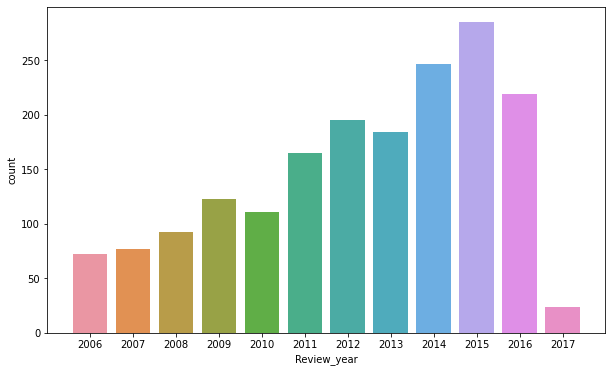

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x = cacao_df['Review_year'])
plt.plot()

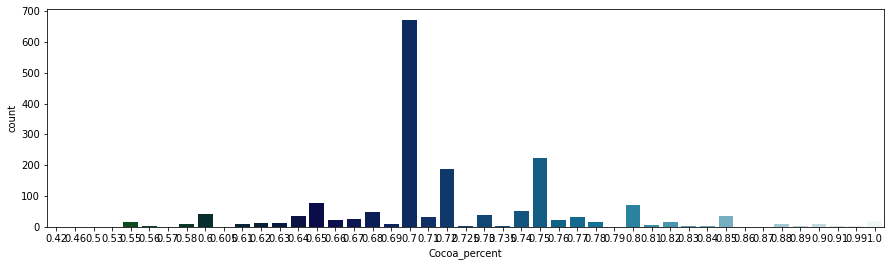

In [117]:
plt.figure(figsize=(15,4))
sns.countplot('Cocoa_percent', data=cacao_df[cacao_df['Cocoa_percent'] > 0.4], palette='ocean')
plt.show()

In [74]:
cacao_df.head()

,Company,Bean_Bar_Origin,REF,Review_year,Cocoa_percent,Company_location,Rating,Bean_type,Bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3,Other,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2,Other,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3,Other,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3,Other,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3,Other,Peru


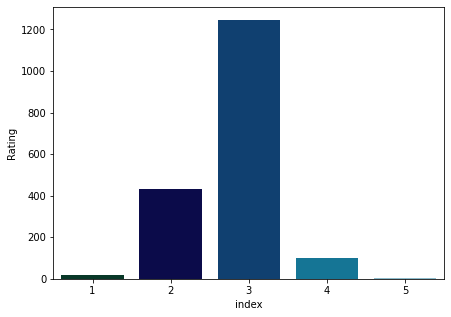

In [118]:
col = 'Rating'
plt.figure(figsize=(7,5))
a = pd.DataFrame(cacao_df[col].value_counts()[:15]).reset_index()
sns.barplot(x='index', y=col, data=a, palette='ocean')
plt.show()

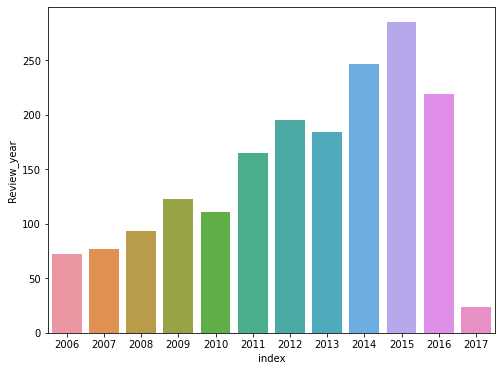

In [124]:
col = 'Review_year'
plt.figure(figsize=(8,6))
a = pd.DataFrame(cacao_df[col].value_counts()[:15]).reset_index()
sns.barplot(x='index', y=col, data=a)
plt.show()

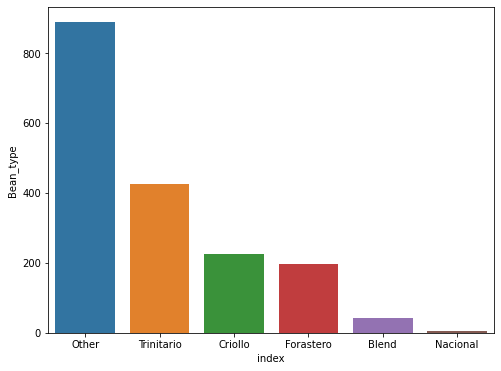

In [123]:
col = 'Bean_type'
plt.figure(figsize=(8,6))
a = pd.DataFrame(cacao_df[col].value_counts()[:6]).reset_index()
sns.barplot(x='index', y=col, data=a)
plt.show()

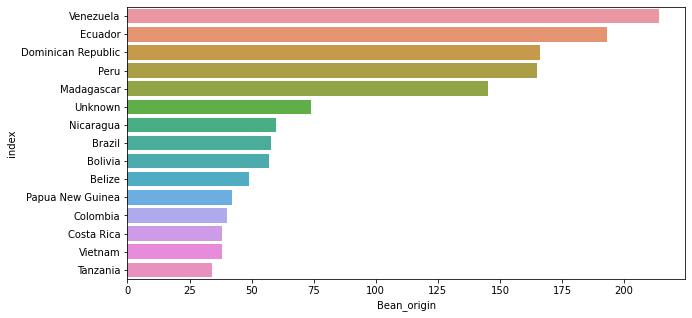

In [122]:
col = 'Bean_origin'
plt.figure(figsize=(10,5))
a = pd.DataFrame(cacao_df[col].value_counts()[:15]).reset_index()
sns.barplot(y='index', x=col, data=a)
plt.show()

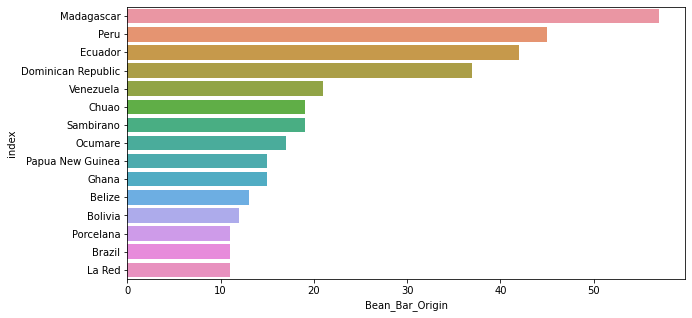

In [116]:
col = 'Bean_Bar_Origin'
plt.figure(figsize=(10,5))
a = pd.DataFrame(cacao_df[col].value_counts()[:15]).reset_index()
sns.barplot(y='index', x=col, data=a)
plt.show()